In [1]:
from __future__ import unicode_literals
from collections import Counter

import matplotlib
matplotlib.rc('font',family='AppleGothic') 
# 한글 폰트명은 시스템에 따라 변경 가능

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def make_simple_line_chart():
    """ 그림 3-1. 간단한 선 그래프 """

    years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
    gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

    # create a line chart, years on x-axis, gdp on y-axis
    plt.plot(years, gdp, color='green', marker='v', linestyle='solid')
    # makrer, linestyle등 표시 방법은 http://matplotlib.org/api/lines_api.html 참조

    # add a title
    plt.title("명목 GDP")

    # add a label to the y-axis
    plt.ylabel("Billions of $")
    plt.show()

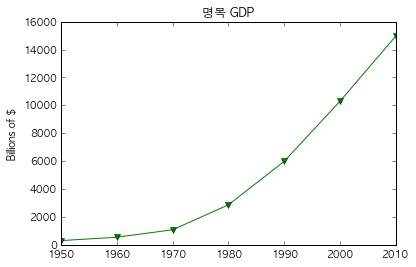

In [3]:
make_simple_line_chart()

In [4]:
def make_simple_bar_chart():
    """ 그림 3-2. 간단한 막대 그래프 """

    movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
    num_oscars = [5, 11, 3, 8, 10]

    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates
    # so that each bar is centered
    xs = [i + 0.1 for i, _ in enumerate(movies)]
    # xs = [0.1, 1.1, 2.1, 3.1, 4.1], 일반적은로 _ 변수는 쓰지 않는 변수를 할당할 때 사용함

    # plot bars with left x-coordinates [xs], heights [num_oscars]
    plt.bar(xs, num_oscars)
    plt.ylabel("# of Academy Awards")
    plt.title("My Favorite Movies")

    # label x-axis with movie names at bar centers
    plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)

    plt.show()

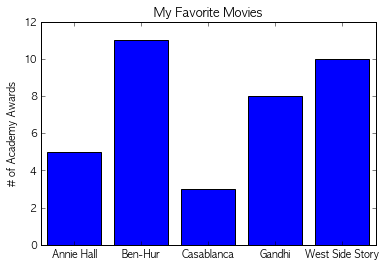

In [5]:
make_simple_bar_chart()

In [6]:
def make_histogram():
    """ 그림 3-3. 막대 그래프로 히스토그램 그리기 """

    grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
    decile = lambda grade: grade // 10 * 10
    histogram = Counter(decile(grade) for grade in grades)
    # Counter([grade // 10 * 10 for grade in grades])
    # Counter({80: 4, 70: 3, 0: 2, 90: 2, 100: 1, 60: 1})

    plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
            histogram.values(),                # give each bar its correct height
            8)                                 # give each bar a width of 8
    plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                               # y-axis from 0 to 5
    plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
    plt.xlabel("Decile")
    plt.ylabel("# of Students")
    plt.title("Distribution of Exam 1 Grades")
    plt.show()

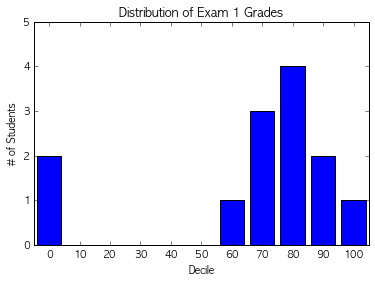

In [7]:
make_histogram()

In [8]:
def make_misleading_y_axis(mislead=True):
    """
    그림 3-4. y축이 오해를 불러일으키는 그래프,
    그림 3-5. y축히 오해를 불러일으키지 않는 그래프 """
    
    # Y축의 간격이 너무 커지는 문제를 지적함

    mentions = [500, 505]
    years = [2013, 2014]

    plt.bar([2012.6, 2013.6], mentions, 0.8)
    plt.xticks(years)
    plt.ylabel("# of times I heard someone say 'data science'")

    # if you don't do this, matplotlib will label the x-axis 0, 1
    # and then add a +2.013e3 off in the corner (bad matplotlib!)
    plt.ticklabel_format(useOffset=False)

    if mislead:
        # misleading y-axis only shows the part above 500
        plt.axis([2012.5,2014.5,499,506]) # Y축의 범례가 499 ~ 506 
        plt.title("Look at the 'Huge' Increase!")
    else:
        plt.axis([2012.5,2014.5,0,550]) # Y축의 범례가 0 ~ 550
        plt.title("Not So Huge Anymore.")
    plt.show()

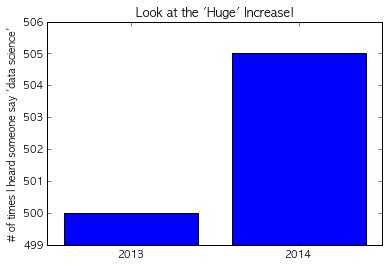

In [9]:
make_misleading_y_axis(mislead=True) # Y축의 범례가 499 ~ 506,  Y축의 간격이 넓어보임

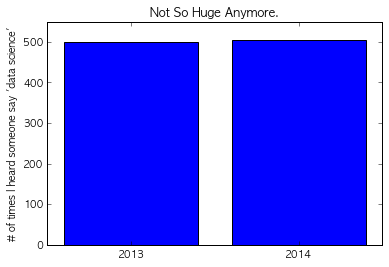

In [10]:
make_misleading_y_axis(mislead=False) # Y축의 범례가 0 ~ 550,  Y축의 간격이 좁아보임

In [11]:
def make_several_line_charts():
    """ 그림 3-6. 여러 개의 선 그래프와 범례 동시에 그리기 """

    variance     = [1,2,4,8,16,32,64,128,256]
    bias_squared = [256,128,64,32,16,8,4,2,1]
    total_error  = [x + y for x, y in zip(variance, bias_squared)]
    # [257, 130, 68, 40, 32, 40, 68, 130, 257]

    xs = range(len(variance))

    # we can make multiple calls to plt.plot
    # to show multiple series on the same chart
    plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
    plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
    plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

    # because we've assigned labels to each series
    # we can get a legend for free
    # loc=9 means "top center"
    plt.legend(loc=9)
    plt.xlabel("model complexity")
    plt.title("The Bias-Variance Tradeoff")
    plt.show()

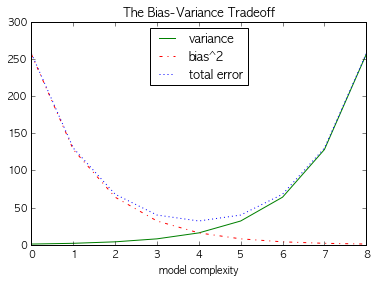

In [12]:
make_several_line_charts()

In [13]:
def make_scatter_plot():
    """ 그림 3-7. 친구의 수와 사이트 체류 시간에 관한 산점도 """

    friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
    minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
    labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

    plt.scatter(friends, minutes)

    # label each point
    for label, friend_count, minute_count in zip(labels, friends, minutes):
        plt.annotate(label,
                     xy=(friend_count, minute_count), # put the label with its point
                     xytext=(5, -5), # but slightly offset, 각 점에 대한 라베링이 떨어진 거리 x축, y축
                     textcoords='offset points')

    plt.title("Daily Minutes vs. Number of Friends")
    plt.xlabel("# of friends")
    plt.ylabel("daily minutes spent on the site")
    plt.show()

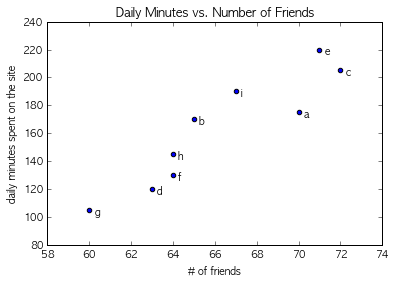

In [14]:
make_scatter_plot()

In [15]:
def make_scatterplot_axes(equal_axes=False):
    """
    그림 3-8. 축 간 공정한 비교를 할 수 없는 산점도
    그림 3-9. 축 간 공정한 비교를 할 수 있는 산점도 """

    test_1_grades = [ 99, 90, 85, 97, 80]
    test_2_grades = [100, 85, 60, 90, 70]

    plt.scatter(test_1_grades, test_2_grades)
    plt.xlabel("test 1 grade")
    plt.ylabel("test 2 grade")

    if equal_axes:
        plt.title("Axes Are Comparable")
        plt.axis("equal") # X, Y 축간 간격을 적절히 조절함
    else:
        plt.title("Axes Aren't Comparable")

    plt.show()

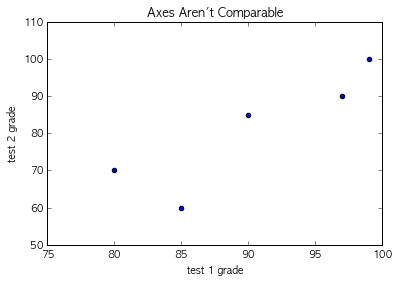

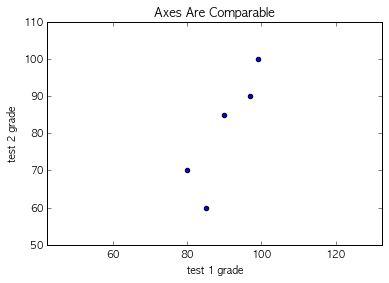

In [16]:
make_scatterplot_axes(equal_axes=False) 
make_scatterplot_axes(equal_axes=True)